<a href="https://colab.research.google.com/github/Salujabalm/Pharmaceutical_Drug_Monitoring_EDA/blob/main/Drug_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pharmaceutical Drug Monitoring EDA**


This Project involves analyzing a pharmaceutical dataset that contains monitoring records for different drugs , tracking their temperature and pressure readings across various times and dates

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Loading and Initial Exploration

In [ ]:
df = pd.read_csv("/content/Pfizer_1.csv")

In [ ]:
df.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [ ]:
df.shape

(18, 15)

In [ ]:
df.dtypes


,0
Date,object
Drug_Name,object
Parameter,object
1:30:00,float64
2:30:00,float64
3:30:00,float64
4:30:00,float64
5:30:00,float64
6:30:00,int64
7:30:00,float64


### RESTRUCTURING THE DATA

In [ ]:
# Transforming Data from wide to long format.
df_melt = pd.melt(df, id_vars=['Date','Drug_Name','Parameter'],var_name='Time', value_name='Reading')

In [ ]:
df_melt

,Date,Drug_Name,Parameter,Time,Reading
0,15-10-2020,diltiazem hydrochloride,Temperature,1:30:00,23.0
1,15-10-2020,diltiazem hydrochloride,Pressure,1:30:00,12.0
2,15-10-2020,docetaxel injection,Temperature,1:30:00,NaN
3,15-10-2020,docetaxel injection,Pressure,1:30:00,NaN
4,15-10-2020,ketamine hydrochloride,Temperature,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,diltiazem hydrochloride,Pressure,12:30:00,14.0
212,17-10-2020,docetaxel injection,Temperature,12:30:00,23.0
213,17-10-2020,docetaxel injection,Pressure,12:30:00,28.0
214,17-10-2020,ketamine hydrochloride,Temperature,12:30:00,24.0


In [ ]:
#Creating Pivot view for easier Analysis
df_pivoted_raw = pd.pivot(df_melt,
                          index = ["Date","Drug_Name","Time"],
                          columns= "Parameter",
                          values = "Reading")

In [ ]:
df_pivoted_raw

Parameter                                    Pressure  Temperature
Date       Drug_Name               Time                           
15-10-2020 diltiazem hydrochloride 10:30:00      18.0         20.0
                                   11:30:00      19.0         20.0
                                   12:30:00      20.0         21.0
                                   1:30:00       12.0         23.0
                                   2:30:00       13.0         22.0
...                                               ...          ...
17-10-2020 ketamine hydrochloride  5:30:00       11.0         17.0
                                   6:30:00       12.0         18.0
                                   7:30:00       12.0         19.0
                                   8:30:00       11.0         20.0
                                   9:30:00       12.0         21.0

[108 rows x 2 columns]

In [ ]:
df_pivoted_raw.index

MultiIndex([('15-10-2020', 'diltiazem hydrochloride', '10:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride', '11:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride', '12:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '1:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '2:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '3:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '4:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '5:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '6:30:00'),
            ('15-10-2020', 'diltiazem hydrochloride',  '7:30:00'),
            ...
            ('17-10-2020',  'ketamine hydrochloride', '12:30:00'),
            ('17-10-2020',  'ketamine hydrochloride',  '1:30:00'),
            ('17-10-2020',  'ketamine hydrochloride',  '2:30:00'),
            ('17-10-2020',  'ketamine hydrochloride',  '3:30:00'),
            ('17-10-2020',  'ketamine hydrochl

In [ ]:
# Resetting index for easier access to data
df_pivot = df_pivoted_raw.reset_index()
df_pivot

Parameter,Date,Drug_Name,Time,Pressure,Temperature
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0
...,...,...,...,...,...
103,17-10-2020,ketamine hydrochloride,5:30:00,11.0,17.0
104,17-10-2020,ketamine hydrochloride,6:30:00,12.0,18.0
105,17-10-2020,ketamine hydrochloride,7:30:00,12.0,19.0
106,17-10-2020,ketamine hydrochloride,8:30:00,11.0,20.0


In [ ]:
df_pivot.columns

Index(['Date', 'Drug_Name', 'Time', 'Pressure', 'Temperature'], dtype='object', name='Parameter')

In [ ]:
df_pivot.columns.name = None

In [ ]:
df_pivot

,Date,Drug_Name,Time,Pressure,Temperature
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0
...,...,...,...,...,...
103,17-10-2020,ketamine hydrochloride,5:30:00,11.0,17.0
104,17-10-2020,ketamine hydrochloride,6:30:00,12.0,18.0
105,17-10-2020,ketamine hydrochloride,7:30:00,12.0,19.0
106,17-10-2020,ketamine hydrochloride,8:30:00,11.0,20.0


## Dealing with Missing Values

In [ ]:
df_pivot.isnull().sum()

,0
Date,0
Drug_Name,0
Time,0
Pressure,13
Temperature,13


### We have 13 missing values for Pressure and 13 missing values for Temperature

In [ ]:
# Checking if Missing values follow any date time Pattern

df_pivot.loc[df_pivot["Pressure"].isnull() | df_pivot["Temperature"].isnull()]

,Date,Drug_Name,Time,Pressure,Temperature
5,15-10-2020,diltiazem hydrochloride,3:30:00,NaN,NaN
15,15-10-2020,docetaxel injection,1:30:00,NaN,NaN
18,15-10-2020,docetaxel injection,4:30:00,NaN,NaN
21,15-10-2020,docetaxel injection,7:30:00,NaN,NaN
22,15-10-2020,docetaxel injection,8:30:00,NaN,NaN
28,15-10-2020,ketamine hydrochloride,2:30:00,NaN,NaN
29,15-10-2020,ketamine hydrochloride,3:30:00,NaN,NaN
31,15-10-2020,ketamine hydrochloride,5:30:00,NaN,NaN
37,16-10-2020,diltiazem hydrochloride,11:30:00,NaN,NaN
53,16-10-2020,docetaxel injection,3:30:00,NaN,NaN


### As seen from the data multiple drugs on Multiple dates have missing values for Temperature and Presure

In [ ]:
# Since ther is no pattern observed and we have ramdomly missing values
# We will calculate mean temperature and pressure for each drug for each date and replace the missing values respectively

def cal_mean_temp_pressure(x):
  x["Temp_mean"] = x["Temperature"].mean()
  x["Temp_pres"] = x["Pressure"].mean()
  return x


In [ ]:
df_final = df_pivot.groupby(["Date", "Drug_Name"]).apply(cal_mean_temp_pressure).reset_index(drop=True)

df_final



<ipython-input-100-ddc169af4190>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_pivot.groupby(["Date", "Drug_Name"]).apply(cal_mean_temp_pressure).reset_index(drop=True)


,Date,Drug_Name,Time,Pressure,Temperature,Temp_mean,Temp_pres
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,21.454545,16.0
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,21.454545,16.0
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,21.454545,16.0
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,21.454545,16.0
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,21.454545,16.0
...,...,...,...,...,...,...,...
103,17-10-2020,ketamine hydrochloride,5:30:00,11.0,17.0,18.500000,11.5
104,17-10-2020,ketamine hydrochloride,6:30:00,12.0,18.0,18.500000,11.5
105,17-10-2020,ketamine hydrochloride,7:30:00,12.0,19.0,18.500000,11.5
106,17-10-2020,ketamine hydrochloride,8:30:00,11.0,20.0,18.500000,11.5


In [ ]:
df_final["Temperature"].fillna(df_final["Temp_mean"],inplace = True)
df_final["Pressure"].fillna(df_final["Temp_pres"],inplace = True)

<ipython-input-102-9580b1335554>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["Temperature"].fillna(df_final["Temp_mean"],inplace = True)
<ipython-input-102-9580b1335554>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         108 non-null    object 
 1   Drug_Name    108 non-null    object 
 2   Time         108 non-null    object 
 3   Pressure     108 non-null    float64
 4   Temperature  108 non-null    float64
 5   Temp_mean    108 non-null    float64
 6   Temp_pres    108 non-null    float64
dtypes: float64(4), object(3)
memory usage: 6.0+ KB


In [ ]:
# Dropping Temp_mean and Temp_pres columns as they are not required, since already used to fill null in Pressure and Temperature columns

df_final.drop(columns = ["Temp_mean","Temp_pres"], inplace = True)

In [ ]:
df_final.head()

,Date,Drug_Name,Time,Pressure,Temperature
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0


#Categorical Analysis

In [ ]:
df1=df_final.copy()
df1.head()

,Date,Drug_Name,Time,Pressure,Temperature
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0


In [ ]:
df1["Temperature"].max()

58.0

In [ ]:
df1["Temperature"].min()

8.0

In [ ]:
df1["Pressure"].max()

30.0

In [ ]:
df1["Pressure"].min()

3.0

In [ ]:
# Binning Temperature value
# 5-20 = "Low" , 20-35 = "Medium", 35-40  = "High" , 40 - 60 = "Very High"

Bins = [5,20,35,40,60]
Labels = ["Low","Medium","High","Very High"]


In [ ]:
df1["Temp_cat"] = pd.cut(df1["Temperature"],bins = Bins , labels = Labels)

In [ ]:
df1.head()

,Date,Drug_Name,Time,Pressure,Temperature,Temp_cat
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,Low
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,Low
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,Medium
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,Medium
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,Medium


In [ ]:
# Binning Pressure value
# 0-10 = "Low" , 10-20 = "Medium", 20-25  = "High" , 25-30 = "Very High"

Bins_Pres = [0,10,20,25,30]
Labels_pres = ["Low","Medium","High","Very High"]

In [ ]:
df1["Pressure_cat"] = pd.cut(df1["Pressure"],bins = Bins_Pres , labels = Labels_pres)

In [ ]:
df1.head()

,Date,Drug_Name,Time,Pressure,Temperature,Temp_cat,Pressure_cat
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,Low,Medium
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,Low,Medium
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,Medium,Medium
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,Medium,Medium
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,Medium,Medium


In [ ]:
# Drugs with Very High Pressure and Very High Temperature

df1.loc[(df1["Temp_cat"] == "Very High")&(df1["Pressure_cat"] == "Very High")]

,Date,Drug_Name,Time,Pressure,Temperature,Temp_cat,Pressure_cat
38,16-10-2020,diltiazem hydrochloride,12:30:00,27.0,42.000000,Very High,Very High
48,16-10-2020,docetaxel injection,10:30:00,28.0,56.000000,Very High,Very High
49,16-10-2020,docetaxel injection,11:30:00,29.0,57.000000,Very High,Very High
50,16-10-2020,docetaxel injection,12:30:00,30.0,58.000000,Very High,Very High
53,16-10-2020,docetaxel injection,3:30:00,27.0,51.454545,Very High,Very High
55,16-10-2020,docetaxel injection,5:30:00,26.0,48.000000,Very High,Very High
56,16-10-2020,docetaxel injection,6:30:00,27.0,49.000000,Very High,Very High
57,16-10-2020,docetaxel injection,7:30:00,28.0,50.000000,Very High,Very High
58,16-10-2020,docetaxel injection,8:30:00,29.0,52.000000,Very High,Very High
59,16-10-2020,docetaxel injection,9:30:00,28.0,55.000000,Very High,Very High


In [ ]:

df1["Timestamp"] = df1["Date"] + " " + df1["Time"]


In [ ]:
df1.head()

,Date,Drug_Name,Time,Pressure,Temperature,Temp_cat,Pressure_cat,Timestamp
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,Low,Medium,15-10-2020 10:30:00
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,Low,Medium,15-10-2020 11:30:00
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,Medium,Medium,15-10-2020 12:30:00
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,Medium,Medium,15-10-2020 1:30:00
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,Medium,Medium,15-10-2020 2:30:00


In [ ]:
df1["Drug_Name"] = df1["Drug_Name"].str.title()

In [ ]:
df1.head(2)

,Date,Drug_Name,Time,Pressure,Temperature,Temp_cat,Pressure_cat,Timestamp
0,15-10-2020,Diltiazem Hydrochloride,10:30:00,18.0,20.0,Low,Medium,15-10-2020 10:30:00
1,15-10-2020,Diltiazem Hydrochloride,11:30:00,19.0,20.0,Low,Medium,15-10-2020 11:30:00


In [ ]:
# Dropping Date and Time columns

df1.drop(columns = ["Date","Time"],inplace = True)

In [ ]:
df1.head()

,Drug_Name,Pressure,Temperature,Temp_cat,Pressure_cat,Timestamp
0,Diltiazem Hydrochloride,18.0,20.0,Low,Medium,15-10-2020 10:30:00
1,Diltiazem Hydrochloride,19.0,20.0,Low,Medium,15-10-2020 11:30:00
2,Diltiazem Hydrochloride,20.0,21.0,Medium,Medium,15-10-2020 12:30:00
3,Diltiazem Hydrochloride,12.0,23.0,Medium,Medium,15-10-2020 1:30:00
4,Diltiazem Hydrochloride,13.0,22.0,Medium,Medium,15-10-2020 2:30:00


In [ ]:
df1["Timestamp"]=pd.to_datetime(df1["Timestamp"])


<ipython-input-124-507a9768b94d>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1["Timestamp"]=pd.to_datetime(df1["Timestamp"])


In [ ]:

df1["Year"] = df1["Timestamp"].dt.year

df1["Month"] = df1["Timestamp"].dt.month

df1["Day"] = df1["Timestamp"].dt.day

df1["Hour"] = df1["Timestamp"].dt.hour

df1["Min"] = df1["Timestamp"].dt.minute

df1["Seconds"] = df1["Timestamp"].dt.second




In [ ]:
df1["Drug_Name"] = df1["Drug_Name"].str.title()

In [ ]:
df1.head()

,Drug_Name,Pressure,Temperature,Temp_cat,Pressure_cat,Timestamp,Year,Month,Day,Hour,Min,Seconds
0,Diltiazem Hydrochloride,18.0,20.0,Low,Medium,2020-10-15 10:30:00,2020,10,15,10,30,0
1,Diltiazem Hydrochloride,19.0,20.0,Low,Medium,2020-10-15 11:30:00,2020,10,15,11,30,0
2,Diltiazem Hydrochloride,20.0,21.0,Medium,Medium,2020-10-15 12:30:00,2020,10,15,12,30,0
3,Diltiazem Hydrochloride,12.0,23.0,Medium,Medium,2020-10-15 01:30:00,2020,10,15,1,30,0
4,Diltiazem Hydrochloride,13.0,22.0,Medium,Medium,2020-10-15 02:30:00,2020,10,15,2,30,0


#Pivot Table Analysis

In [ ]:
# Mean Temperature and Pressure for all Drugs over Different Days
df1["Date"] = df1["Timestamp"].dt.date

pivot = pd.pivot_table(
    df1,
    index="Date",
    columns="Drug_Name",
    values=["Temperature", "Pressure"],
    aggfunc="mean",margins= "All").round(2)

pivot



Pressure                                             \
Drug_Name  Diltiazem Hydrochloride Docetaxel Injection Ketamine Hydrochloride   
Date                                                                            
2020-10-15                   16.00               24.88                   9.33   
2020-10-16                   22.55               27.00                  14.80   
2020-10-17                    7.73               24.50                  11.50   
All                          15.42               25.46                  11.88   

                              Temperature                      \
Drug_Name     All Diltiazem Hydrochloride Docetaxel Injection   
Date                                                            
2020-10-15  16.74                   21.45               20.75   
2020-10-16  21.45                   37.45               51.45   
2020-10-17  14.58                   15.64               17.50   
All         17.59                   24.85               29.90   

                                          
Drug_Name  Ketamine Hydrochloride    All  
Date                                      
2020-10-15                  23.56  21.92  
2020-10-16                  11.50  33.47  
2020-10-17                  18.50  17.21  
All                         17.85  24.20

In [ ]:
# Min Temperature and Pressure for all Drugs over Different Days
df1["Date"] = df1["Timestamp"].dt.date

pd.pivot_table(
    df1,
    index="Date",
    columns="Drug_Name",
    values=["Temperature", "Pressure"],
    aggfunc="min",margins= "All").round(2)




Pressure                                             \
Drug_Name  Diltiazem Hydrochloride Docetaxel Injection Ketamine Hydrochloride   
Date                                                                            
2020-10-15                    11.0                22.0                    7.0   
2020-10-16                    18.0                23.0                   12.0   
2020-10-17                     3.0                20.0                    8.0   
All                            3.0                20.0                    7.0   

                             Temperature                      \
Drug_Name    All Diltiazem Hydrochloride Docetaxel Injection   
Date                                                           
2020-10-15   7.0                    20.0                17.0   
2020-10-16  12.0                    34.0                46.0   
2020-10-17   3.0                    10.0                12.0   
All          3.0                    10.0                12.0   

                                         
Drug_Name  Ketamine Hydrochloride   All  
Date                                     
2020-10-15                   20.0  17.0  
2020-10-16                    8.0   8.0  
2020-10-17                   13.0  10.0  
All                           8.0   8.0

In [ ]:
# Max Temperature and Pressure for all Drugs over Different Days
df1["Date"] = df1["Timestamp"].dt.date

pd.pivot_table(
    df1,
    index="Date",
    columns="Drug_Name",
    values=["Temperature", "Pressure"],
    aggfunc="max",margins= "All").round(2)





Pressure                                             \
Drug_Name  Diltiazem Hydrochloride Docetaxel Injection Ketamine Hydrochloride   
Date                                                                            
2020-10-15                    24.0                29.0                   11.0   
2020-10-16                    27.0                30.0                   18.0   
2020-10-17                    14.0                29.0                   15.0   
All                           27.0                30.0                   18.0   

                             Temperature                      \
Drug_Name    All Diltiazem Hydrochloride Docetaxel Injection   
Date                                                           
2020-10-15  29.0                    23.0                25.0   
2020-10-16  30.0                    42.0                58.0   
2020-10-17  29.0                    20.0                23.0   
All         30.0                    42.0                58.0   

                                         
Drug_Name  Ketamine Hydrochloride   All  
Date                                     
2020-10-15                   27.0  27.0  
2020-10-16                   15.0  58.0  
2020-10-17                   24.0  24.0  
All                          27.0  58.0

# Data Visualization

###Creates trend plots for temperature and pressure across dates
###Uses boxplots to visualize distributions by drug
###Creates heatmaps from pivot tables for easier pattern identification

In [ ]:
df1.head()

,Drug_Name,Pressure,Temperature,Temp_cat,Pressure_cat,Timestamp,Year,Month,Day,Hour,Min,Seconds,Date
0,Diltiazem Hydrochloride,18.0,20.0,Low,Medium,2020-10-15 10:30:00,2020,10,15,10,30,0,2020-10-15
1,Diltiazem Hydrochloride,19.0,20.0,Low,Medium,2020-10-15 11:30:00,2020,10,15,11,30,0,2020-10-15
2,Diltiazem Hydrochloride,20.0,21.0,Medium,Medium,2020-10-15 12:30:00,2020,10,15,12,30,0,2020-10-15
3,Diltiazem Hydrochloride,12.0,23.0,Medium,Medium,2020-10-15 01:30:00,2020,10,15,1,30,0,2020-10-15
4,Diltiazem Hydrochloride,13.0,22.0,Medium,Medium,2020-10-15 02:30:00,2020,10,15,2,30,0,2020-10-15


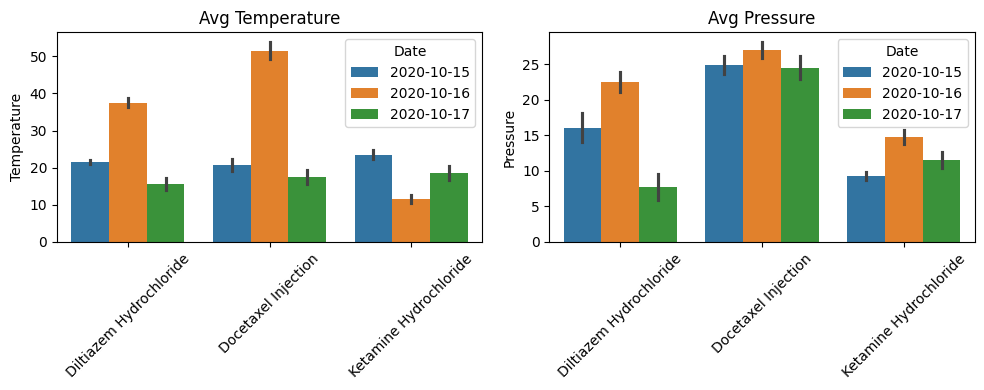

In [ ]:
# Average Temperature and Pressure of Drugs

plt.figure(figsize=(10, 4))  # Create one big figure for both plots

# First subplot for Temperature
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
sns.barplot(data=df1, x="Drug_Name", y="Temperature", estimator=np.mean, hue="Date")
plt.title("Avg Temperature")
plt.xlabel("")
plt.xticks(rotation=45)

# Second subplot for Pressure
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
sns.barplot(data=df1, x="Drug_Name", y="Pressure", estimator=np.mean, hue="Date")
plt.title("Avg Pressure")
plt.xlabel("")
plt.xticks(rotation=45)

plt.tight_layout()  # Prevent overlapping
plt.show()


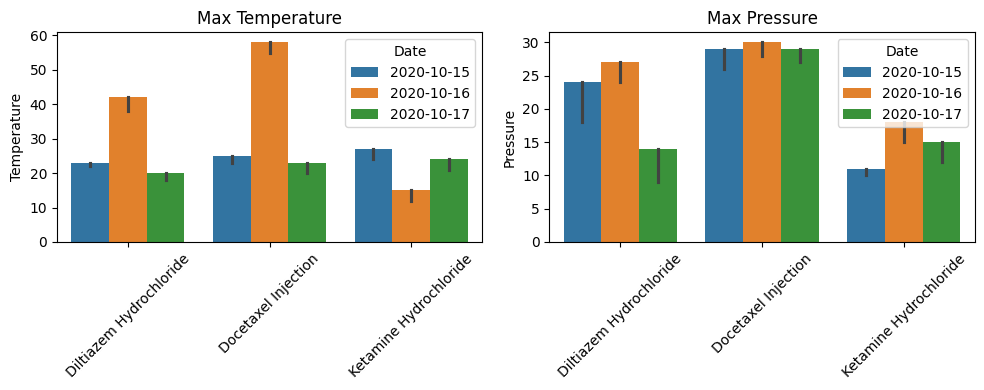

In [ ]:
# Max Temperature and Pressure of Drugs

plt.figure(figsize=(10, 4))  # Create one big figure for both plots

# First subplot for Temperature
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
sns.barplot(data=df1, x="Drug_Name", y="Temperature", estimator=np.max, hue="Date")
plt.title("Max Temperature")
plt.xlabel("")
plt.xticks(rotation=45)

# Second subplot for Pressure
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
sns.barplot(data=df1, x="Drug_Name", y="Pressure", estimator=np.max, hue="Date")
plt.title("Max Pressure")
plt.xlabel("")
plt.xticks(rotation=45)

plt.tight_layout()  # Prevent overlapping
plt.show()

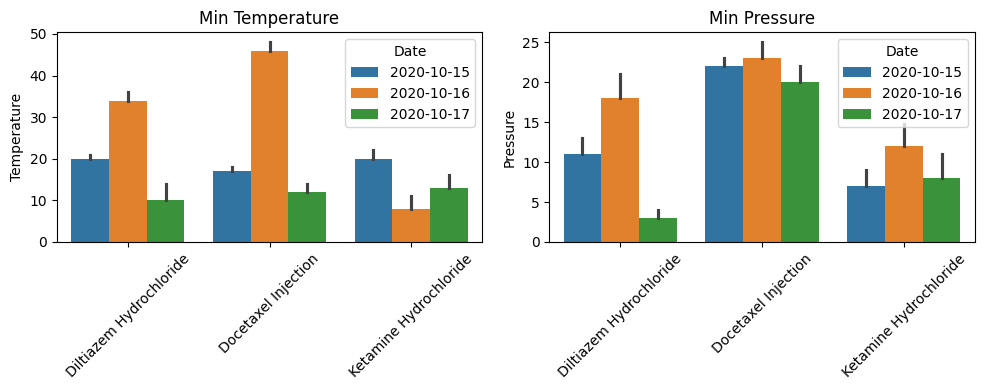

In [ ]:
# Min Temperature and Pressure of Drugs

plt.figure(figsize=(10, 4))

# First subplot for Temperature
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
sns.barplot(data=df1, x="Drug_Name", y="Temperature", estimator=np.min, hue="Date")
plt.title("Min Temperature")
plt.xlabel("")
plt.xticks(rotation=45)

# Second subplot for Pressure
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
sns.barplot(data=df1, x="Drug_Name", y="Pressure", estimator=np.min, hue="Date")
plt.title("Min Pressure")
plt.xlabel("")
plt.xticks(rotation=45)

plt.tight_layout()  # Prevent overlapping
plt.show()

In [ ]:
df1["Drug_Name"].unique()


array(['Diltiazem Hydrochloride', 'Docetaxel Injection',
       'Ketamine Hydrochloride'], dtype=object)

In [ ]:
Diltiazem_Hydrochloride = df1.loc[df1["Drug_Name"] == "Diltiazem Hydrochloride"]

In [ ]:
Docetaxel_Injection = df1.loc[df1["Drug_Name"] == "Docetaxel Injection"]

In [ ]:
Ketamine_Hydrochloriden = df1.loc[df1["Drug_Name"] == "Ketamine Hydrochloride"]

In [ ]:
DH_Temp = Diltiazem_Hydrochloride["Temperature"]
DI_Temp = Docetaxel_Injection["Temperature"]
KI_Temp = Ketamine_Hydrochloriden["Temperature"]

In [ ]:
DH_Pres = Diltiazem_Hydrochloride["Pressure"]
DI_Pres = Docetaxel_Injection["Pressure"]
KI_Pres = Ketamine_Hydrochloriden["Pressure"]

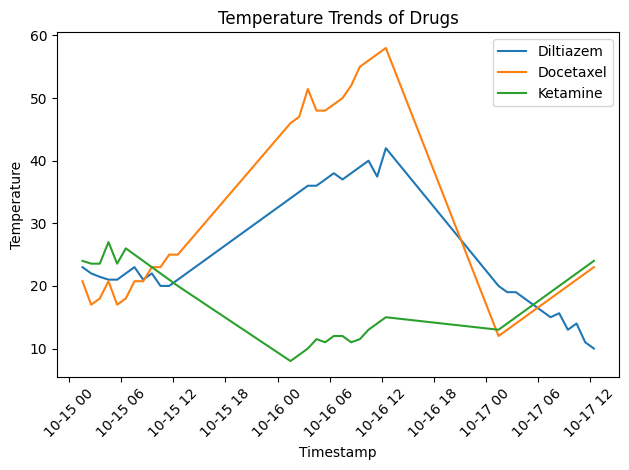

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot each drug's temperature over time with a label
sns.lineplot(data=Diltiazem_Hydrochloride, x="Timestamp", y="Temperature", label="Diltiazem")
sns.lineplot(data=Docetaxel_Injection, x="Timestamp", y="Temperature", label="Docetaxel")
sns.lineplot(data=Ketamine_Hydrochloriden, x="Timestamp", y="Temperature", label="Ketamine")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend (uses the labels given above)
plt.legend()

# Show the plot
plt.title("Temperature Trends of Drugs")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()


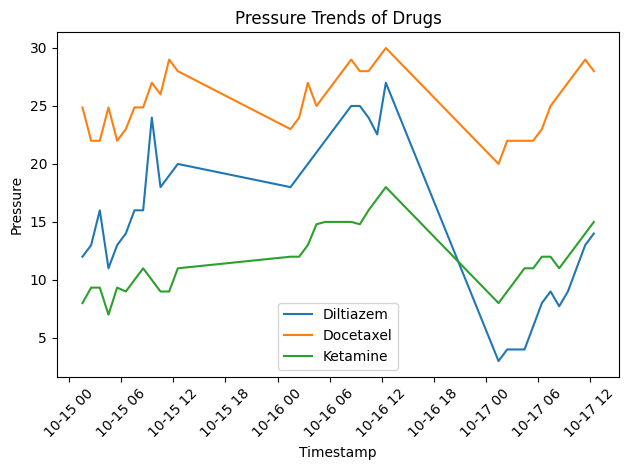

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot each drug's pressure over time with a label
sns.lineplot(data=Diltiazem_Hydrochloride, x="Timestamp", y="Pressure", label="Diltiazem")
sns.lineplot(data=Docetaxel_Injection, x="Timestamp", y="Pressure", label="Docetaxel")
sns.lineplot(data=Ketamine_Hydrochloriden, x="Timestamp", y="Pressure", label="Ketamine")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend (uses the labels given above)
plt.legend()

# Show the plot
plt.title("Pressure Trends of Drugs")
plt.xlabel("Timestamp")
plt.ylabel("Pressure")
plt.tight_layout()
plt.show()


#Summary Report

###Generates a comprehensive report of findings
###Includes statistics by drug and date
###Analyzes missing value patterns
###Summarizes category distributions

##ok
##no

